In [83]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [84]:
data_train_path = r'C:\Users\utilisateur\Documents\MicrosoftIA\detection_mask\Dataset_masks\train'
data_test_path = r'C:\Users\utilisateur\Documents\MicrosoftIA\detection_mask\Dataset_masks\test'
categorie_train = os.listdir(data_train_path)
categorie_test = os.listdir(data_test_path)
labels_train = [i for i in range(len(categorie_train))]
labels_test = [i for i in range(len(categorie_test))]

label_train_dict = dict(zip(categorie_train,labels_train))
label_test_dict = dict(zip(categorie_test,labels_test))
print(label_train_dict)
print(label_test_dict)

{'without_mask': 0, 'with_mask': 1}
{'without_mask': 0, 'with_mask': 1}


In [85]:
img_size = 96
data_train = []
data_test = []
target_train = []
target_test = []

In [86]:
for category in categorie_train:
    folder_path = os.path.join(data_train_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        
        #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img, (img_size, img_size))
        data_train.append(img_resized)
        target_train.append(label_train_dict[category])

In [87]:
for category in categorie_test:
    folder_path = os.path.join(data_test_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        
        #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img, (img_size, img_size))
        data_test.append(img_resized)
        target_test.append(label_test_dict[category])

In [90]:
data_train = np.array(data_train)
data_test = np.array(data_test)
data_train = data_train.reshape(-1,96,96,3).astype('float')/255
data_test = data_test.reshape(-1,96,96,3).astype('float')/255
target_train = np.array(target_train)
target_test = np.array(target_test)
# new_target = np_utils.to_categorical(target)

In [91]:
print(data_train.shape)
print(data_test.shape)

(1315, 96, 96, 3)
(194, 96, 96, 3)


In [92]:
print(target_train.shape)
print(target_test.shape)

(1315,)
(194,)


In [93]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',  input_shape=(96, 96, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(256, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
model.fit(data_train, target_train, epochs=10, validation_data=(data_test, target_test), shuffle=True)

Epoch 1/10
42/42 [==============================] - 40s 931ms/step - loss: 0.5769 - accuracy: 0.6420 - val_loss: 0.1435 - val_accuracy: 0.9485
Epoch 2/10
42/42 [==============================] - 39s 920ms/step - loss: 0.1392 - accuracy: 0.9648 - val_loss: 0.0869 - val_accuracy: 0.9588
Epoch 3/10
42/42 [==============================] - 37s 884ms/step - loss: 0.1101 - accuracy: 0.9673 - val_loss: 0.1089 - val_accuracy: 0.9536
Epoch 4/10
42/42 [==============================] - 37s 879ms/step - loss: 0.0837 - accuracy: 0.9716 - val_loss: 0.0925 - val_accuracy: 0.9639
Epoch 5/10
42/42 [==============================] - 37s 884ms/step - loss: 0.0746 - accuracy: 0.9721 - val_loss: 0.0931 - val_accuracy: 0.9536
Epoch 6/10
42/42 [==============================] - 37s 871ms/step - loss: 0.0526 - accuracy: 0.9777 - val_loss: 0.0837 - val_accuracy: 0.9691
Epoch 7/10
42/42 [==============================] - 37s 870ms/step - loss: 0.1219 - accuracy: 0.9556 - val_loss: 0.1709 - val_accuracy: 0.9485

In [95]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [96]:
print(model.evaluate(data_test, target_test))

7/7 [==============================] - 2s 228ms/step - loss: 0.1417 - accuracy: 0.9639
[0.1417093425989151, 0.9639175534248352]


In [97]:
pred = model.predict_classes(data_test)
cm = metrics.confusion_matrix(target_test, pred)

C:\Users\utilisateur\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


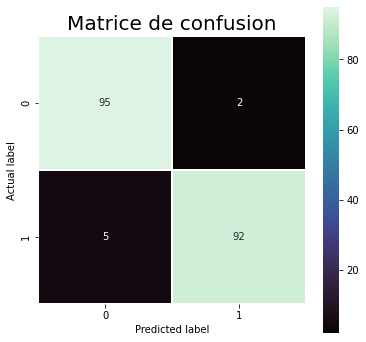

In [98]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='mako')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size=20)
plt.show()